In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [135]:
df = pd.read_csv("winequality-red.csv")

In [136]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [138]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [139]:
vc=df["quality"].value_counts()
vc

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

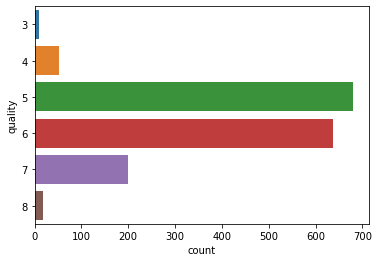

In [140]:
sns.countplot(data=df,y="quality")

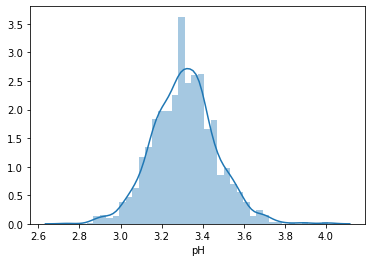

In [141]:
sns.distplot(df["pH"])  # pH distribution

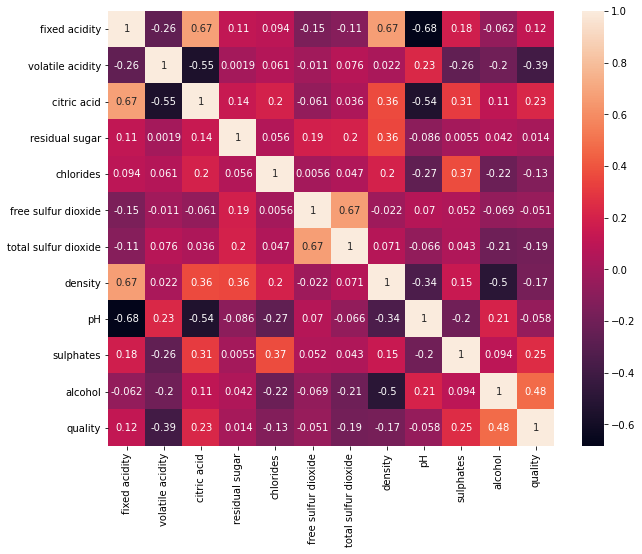

In [142]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [143]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


In [144]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [145]:
## preparing data for clustering

In [146]:
target_col = df["quality"]

In [147]:
target_col

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [148]:
sc = StandardScaler()

In [149]:
df_scaled = sc.fit_transform(df)

In [150]:
df_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

In [151]:
df_scaled = pd.DataFrame(df_scaled,columns=df.columns)
df_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


In [152]:

kmeans = KMeans(
        n_clusters=6,
        max_iter=1000,
        random_state=1,
        init="random"
            )


In [153]:
kmeans.fit(df_scaled)

KMeans(init='random', max_iter=1000, n_clusters=6, random_state=1)

In [154]:
y_km = kmeans.predict(df_scaled)

In [159]:
cluster_centre  = pd.DataFrame(kmeans.cluster_centers_,columns=df.columns)

In [160]:
cluster_centre

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.041842,0.072370,0.069753,-0.100205,-0.030330,0.937458,1.187992,0.264947,-0.142706,-0.221541,-0.624626,-0.464036
1,-0.618848,-0.467039,-0.125523,-0.226296,-0.384579,0.143304,-0.231554,-1.158374,0.541096,0.201795,1.236736,0.849546
2,-0.188637,-0.051583,0.400212,4.244759,0.206318,1.589869,1.742223,1.035402,-0.194548,0.085332,-0.315419,-0.222342
3,1.378218,-0.689121,1.153195,0.102163,-0.004633,-0.565416,-0.546030,0.799599,-0.856073,0.341125,0.196998,0.422209
4,0.081831,0.017955,1.144178,-0.399396,5.604731,-0.070479,0.474416,0.185803,-1.687357,3.720608,-0.882563,-0.360695
5,-0.489153,0.691740,-0.819240,-0.214826,-0.070664,-0.434285,-0.419141,-0.087270,0.430782,-0.418789,-0.412687,-0.462350


In [161]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

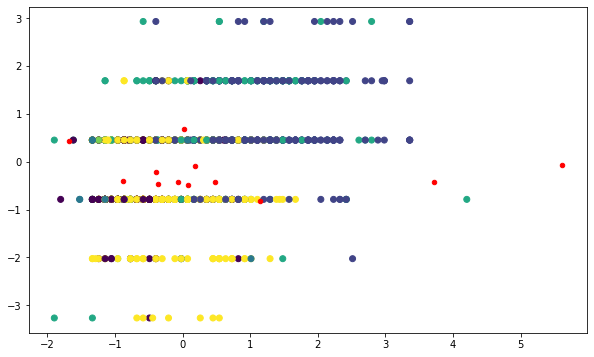

In [179]:
plt.figure(figsize=(10,6))
plt.scatter(df_scaled["alcohol"],df_scaled["quality"],c=y_km)
plt.scatter(kmeans.cluster_centers_[-2],kmeans.cluster_centers_[-1],c="red",s=20)

In [186]:
!pip install kneed
from kneed import KneeLocator

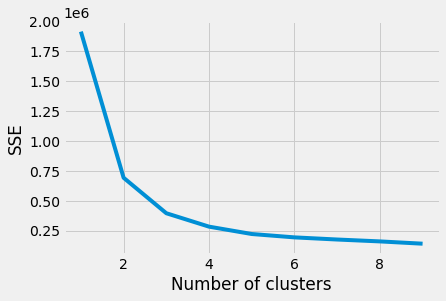

3


In [187]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}

sse = []
for i in range(1,10,1):
    kmeans = KMeans(n_clusters=i, **kmeans_kwargs).fit(df)
    sse.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.plot(range(1,10,1), sse)
plt.show()
kl = KneeLocator(range(1, 10, 1), sse, curve="convex", direction="decreasing")
print(kl.elbow)

    

In [ ]:
## thus we successfully performed KMEANS clustering on Red-wine quality dataset.